<a href="https://colab.research.google.com/github/sreemathymahes/NetCDF/blob/main/Reading_NetCDF4_Data_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="images/000_000_epom_logo.png" alt="ePOM" title="" align="center" width="12%" alt="Python logo\"></a>

# Introduction

In oceanography, multidimensional data structures like climate, salinity, and temperature data are frequently used. Such data is difficult to store in text files since doing so would use a significant amount of memory and take a long time to read, write, and process. NetCDF4 is one of the best tools for handling such data. The information is kept in HDF5 format (Hierarchical Data Format). The HDF5 is made to accommodate a lot of data. The University Corporation for Atmospheric Research's Unidata Program is the home of the project known as NetCDF (UCAR).

In this chapter is going to give a brief on
   * Reading NetCDF data
   * Accessing the Dataset via OPeNDAP
   * Reading and analyzing NetCDF data with the help of Xarray
   
   
   
   
    



<img align="left" width="6%" style="padding-right:10px;" src="images/key.png">

[NetCDF](https://www.unidata.ucar.edu/software/netcdf/) (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data.



# Reading NetCDF data

The netCDF data has the extension of .nc.

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Importing NetCDF and Numpy ( a Python library that supports large multi-dimensional arrays or matrices):

In [ ]:
import netCDF4
import numpy as np

The below code is opening the Netcdf file which has the SST of the global Ocean .

When we print the object "SST", we get information regarding the time, resolution, sensor information etc. These are called **metadata**.



In [ ]:
SST = netCDF4.Dataset('20220814120000-REMSS-L4_GHRSST-SSTfnd-MW_IR_OI-GLOB-v02.0-fv05.0.nc')
print(SST)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6,ACDD-1.3
    title: Analysed foundation sea surface temperature over the global ocean
    summary: A merged, multi-sensor L4 foundation SST product from Remote Sensing Systems
    references: http://www.remss.com/measurements/sea-surface-temperature/oisst-description
    institution: REMSS
    history: 2022-10-20 23:38:45+0000 created by fuse_sensor_data.py v0.5
    comment: This research was supported by the NASA Physical Oceanography Program
    license: GHRSST protocol describes data use as free and open
    id: REMSS-L4-MW_IR
    naming_authority: org.ghrsst
    product_version: v05.0
    uuid: fdfd181d-1301-4bb9-b3ad-bb49dfadf09b
    gds_version_id: 2.0
    netcdf_version_id: 4.8.1
    date_created: 20221020T233845Z
    file_quality_level: 3
    spatial_resolution: 9 km
    start_time: 20220814T000000Z
    time_coverage_start: 20220814T000000Z
    stop_time: 20220814T23595

**Note:** We can view the data set's size and variable information in the above object file print output. This dataset has 3 dimensions: lat(with size 2048), lon (size: 4096), time (size: 1).  TThe variables are outputted with their data type such as int16 analysed_sst.

---

We can access the metadata from SST just like we read a dictionary in Python.

In [ ]:
print(SST.variables.keys()) # get all variable names


dict_keys(['lat', 'lon', 'time', 'analysed_sst', 'analysis_error', 'sea_ice_fraction', 'mask'])


***

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Using the below code access the individual keys like **lat**, **long** and **analysed_sst** and show the dimensions, shape and data stored in the variables.

In [ ]:
lat= SST.variables['lat']
lon=SST.variables['lon']
temp = SST.variables['analysed_sst'] # SST


print("Latitude variable information \n")
print("Latitude Dimension: %s" % lat.dimensions) # read the dimension of the variable
print("Latitude Shape: %s" % lat.shape) #read the shape of the variable
print("Latitude Data: %s \n" % lat[:]) #read the data of the variable


print("Longitude variable information \n")
print("Longitude Dimension: %s" % lon.dimensions)
print("Longitude Shape: %s" % lon.shape)
print("Longitude Data: %s \n" % lon[:])

print("SST variable information \n")

print("SST Dimension: " + str( temp.dimensions)) # multi-dimension data are stored as tuples
print("SST Shape: "+ str(temp.shape))
print("SST Data: %s" % temp[:])


Latitude variable information 

Latitude Dimension: lat
Latitude Shape: 2048
Latitude Data: [-89.956   -89.86811 -89.78022 ...  89.78022  89.86811  89.956  ] 

Longitude variable information 

Longitude Dimension: lon
Longitude Shape: 4096
Longitude Data: [-179.956   -179.8681  -179.78021 ...  179.78021  179.8681   179.956  ] 

SST variable information 

SST Dimension: ('time', 'lat', 'lon')
SST Shape: (1, 2048, 4096)
SST Data: [[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [271.34999999999997 271.34999999999997 271.34999999999997 ...
   271.34999999999997 271.34999999999997 271.34999999999997]
  [271.34999999999997 271.34999999999997 271.34999999999997 ...
   271.34999999999997 271.34999999999997 271.34999999999997]
  [271.34999999999997 271.34999999999997 271.34999999999997 ...
   271.34999999999997 271.34999999999997 271.34999999999997]]]


<img align="left" width="6%" style="padding-right:10px;" src="images/info.png">

While print( lat[:]) gives the actual latitude data stored in the object, print(lat) will give the latitude metadata. Try it.

---

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Plot the SST from the netcdf file using the matlplotlib.

Text(0, 0.5, 'Latitude')

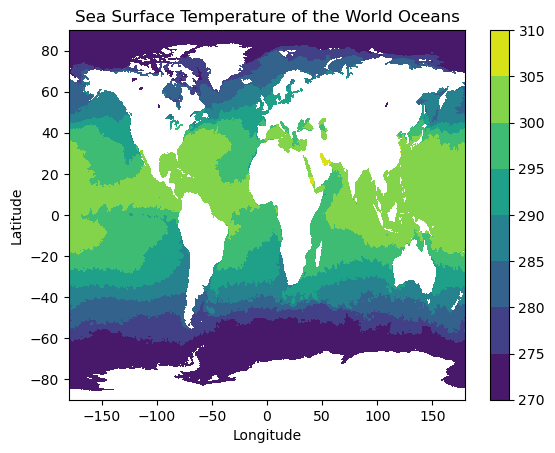

In [ ]:
from matplotlib import pyplot as plt

plt.contourf(lon[:], lat[:], temp[0,:,:]) # to plot temp contours
plt.colorbar()
plt.title("Sea Surface Temperature of the World Oceans" )
plt.xlabel("Longitude")
plt.ylabel("Latitude")

---

In [ ]:
SST.close()

Close the NetCDF file once the processing is over.

***

# Accessing the Remote Data via openDAP

<img align="left" width="6%" style="padding-right:10px;" src="images/key.png">

# What is OPeNDAP?

Open-source Project for a Network Data Access Protocol [(OPeNDAP)](https://www.opendap.org/) is the developer of client/server software, of the same name, that enables scientists to share data more easily over the internet.

With OPeNDAP, you can access data from any database server that supports OPeNDAP by using an OPeNDAP URL. Through a custom user interface, a command-line interface, or the Internet. Other programmes that support NetCDF include Python, Matlab, R, IDL, IDV, and Panoply.

## How to use OPeNDAP?

One Example of OPeNDAP is given below,

http://test.opendap.org/dap/data/nc/sst.mnmean.nc.gz

This URL points to monthly means of sea surface temperature, worldwide, compiled by Richard Reynolds of the Climate Modeling branch of NOAA.

Downloading the data that the URL points to is the simplest option. You can either append.ascii and send the URL to a standard web browser, or you may feed it to an OPeNDAP-enabled data analysis programme like Ferret, use NetCDF or Xarray packages of python. This strategy would be less than ideal, though, as that URL contains a substantial amount of information that you presumably wouldn't want. Instead, you should become familiar with the types of data the database stores before using limited queries to only retrieve the information you require.

---

The below code downloads the CTD profile over Netherlands as NetCDF file using the Deltares OPeNDAP server. The url contains lat, long, depth, time and sea_water_salinity parameters just like the API request parameters.

In [ ]:
# The URL points to the OPeNDAP dataset
dap_url = r'http://opendap.deltares.nl/thredds/dodsC/opendap/rijkswaterstaat/CTD/old/salinity/CTD_2008_sea_water_salinity.nc?longitude[0:1:185],latitude[0:1:185],depth[0:1:185],time[0:1:185],sea_water_salinity[0:1:185]'

# The Dataset is read using Dataset funactin of NetCDF package
dap_data= netCDF4.Dataset(dap_url)
print(dap_data.variables.keys())


dict_keys(['longitude', 'latitude', 'depth', 'time', 'sea_water_salinity'])


***

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Plot the Depth-Salinity from the CTD NetCDF file.

Text(0, 0.5, 'Salinity [PSU]')

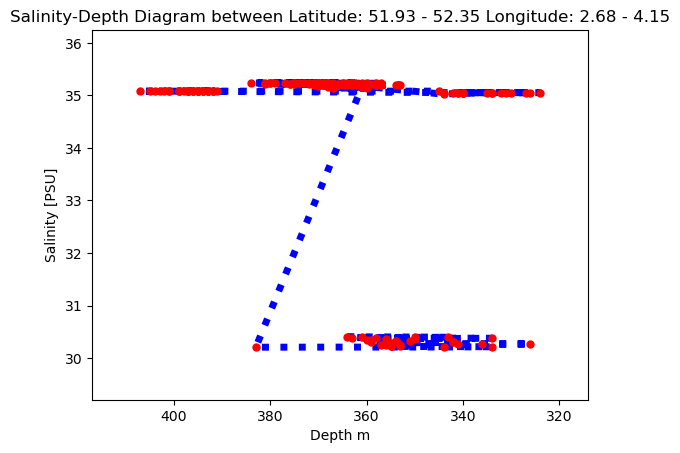

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

lat= dap_data.variables['latitude'][:]
lon=dap_data.variables['longitude'][:]
sal=dap_data.variables['sea_water_salinity'][:]
depth= dap_data.variables['depth'][:]
min_lat= round(lat.min(),2)
max_lat=round(lat.max(),2)
min_ln=round(lon.min(),2)
max_ln=round(lon.max(),2)
title="Salinity-Depth Diagram between Latitude: "+str(min_lat)+ " - "+ str(max_lat)+ " Longitude: "+str(min_ln)+ " - "+ str(max_ln)


plt.plot(  depth, sal,color='blue', linewidth=5, linestyle='dotted',
         marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red' )
plt.axis([ (depth.max())+10, (depth.min()) - 10, sal.min() -1, sal.max() +1])
plt.title(title)
plt.xlabel("Depth m")
plt.ylabel("Salinity [PSU]")



**Note: The graph shows that the salinity value ranges fron 30-31 PSU between 365-330 m depth. Try to look at the salinity distribtion between 365-330 m depth by changing the extent.**

In [ ]:
dap_data.close() # close the .nc file

***

# Reading and analyzing NetCDF data with Xarray

## What is Xarray?

The capabilities of NumPy arrays are enhanced by XArray, which offers a lot of simplified data manipulation. It is comparable to Pandas in that regard, however XArray specialises in handling N-dimensional arrays of data, whereas Pandas excels at working with tabular data (i.e. grids). Although its interface is mostly based on the netCDF data model (variables, attributes, and dimensions), it goes beyond the standard netCDF APIs to give capabilities akin to the Common Data Model of netCDF-java (CDM).

#### ERDDAP
[ERDDAP](https://oceanwatch.pifsc.noaa.gov/erddap/index.html) is a data server that gives you a simple, consistent way to download subsets of scientific datasets in common file formats and make graphs and maps. This particular ERDDAP installation has oceanographic data (for example, data from satellites and buoys).

---

The below code download SST data (OceanWatch) for Hudson Bay (GGE6302 Project study Area) from ERDDAP with time, lat and lon parameters.

In [ ]:
import urllib.request

url="https://oceanwatch.pifsc.noaa.gov/erddap/griddap/CRW_sst_v1_0_monthly.nc?analysed_sst%5B(2019-01-01T12:00:00Z):1:(2019-12-01T12:00:00Z)%5D%5B(51.190361):1:(64.623877)%5D%5B(264.76609):1:(283.70691)%5D"
urllib.request.urlretrieve(url, "sst.nc") # retrieve data from URL

URLError: ignored


<img align="left" width="6%" style="padding-right:10px;" src="images/key.png">

The [xarray](http://xarray.pydata.org/en/stable/why-xarray.html) package makes working with NetCDF files incredibly simple.

We can now import the data and extract our key variables after downloading it and storing it in our local variable **sst** in the above code.



Import NetCDF and XArray packages

In [ ]:
import xarray as xr
import netCDF4 as nc

---
Let's open the .nc file as xarray dataset and examine the variable as we did for the previous .nc files

In [ ]:
data = xr.open_dataset('sst.nc',decode_cf=False) # open the .nc file

# display data details along with metadata
data

<xarray.Dataset>
Dimensions:       (time: 12, latitude: 270, longitude: 380)
Coordinates:
  * time          (time) float64 1.546e+09 1.549e+09 ... 1.573e+09 1.575e+09
  * latitude      (latitude) float32 51.17 51.22 51.28 ... 64.53 64.57 64.62
  * longitude     (longitude) float32 264.8 264.8 264.9 ... 283.6 283.7 283.7
Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...
Attributes: (12/64)
    acknowledgement:            NOAA Coral Reef Watch Program
    cdm_data_type:              Grid
    comment:                    This product is designed to improve on and re...
    contributor_name:           NOAA Coral Reef Watch program
    contributor_role:           Collecting source data and deriving products;...
    Conventions:                CF-1.6, ACDD-1.3, COARDS
    ...                         ...
    time_coverage_duration:     P1D
    time_coverage_end:          2019-12-01T12:00:00Z
    time_coverage_resolution:   P1D
    time_coverage_start:        2019-01-01T12:00:00Z
    title:                      ZZZ - DEPRECATED - Sea Surface Temperature, C...
    Westernmost_Easting:        264.775

**Note:**
Xarray produces a much more readable output. Click on each variable drop-down and read the details of the varible.

---

In [ ]:
#examine co-ordinates and variables

print(data.coords)
print(data.data_vars)

Coordinates:
  * time       (time) float64 1.546e+09 1.549e+09 ... 1.573e+09 1.575e+09
  * latitude   (latitude) float32 51.17 51.22 51.28 51.33 ... 64.53 64.57 64.62
  * longitude  (longitude) float32 264.8 264.8 264.9 264.9 ... 283.6 283.7 283.7
Data variables:
    analysed_sst  (time, latitude, longitude) float64 ...


---

Let's look at the structure/dimension of analysed_sst:

In [ ]:
data.analysed_sst.shape

(12, 270, 380)

From the result we can see that the dataset is a 3-D array with 270 rows corresponding to latitudes and 380 columns corresponding to longitudes, for 12 time step.



Let's get the dates for 12 time step:

In [ ]:
data.time[0]

<xarray.DataArray 'time' ()>
array(1.546344e+09)
Coordinates:
    time     float64 1.546e+09
Attributes:
    _CoordinateAxisType:    Time
    actual_range:           [1.5463440e+09 1.5752016e+09]
    axis:                   T
    coverage_content_type:  coordinate
    ioos_category:          Time
    long_name:              reference time of the sst field
    standard_name:          time
    time_origin:            01-JAN-1970 00:00:00
    units:                  seconds since 1970-01-01T00:00:00Z

In [ ]:
date=nc.num2date(data.time,data.time.units,only_use_cftime_datetimes=False) # converts numeric data to calender date
date

array([real_datetime(2019, 1, 1, 12, 0), real_datetime(2019, 2, 1, 12, 0),
       real_datetime(2019, 3, 1, 12, 0), real_datetime(2019, 4, 1, 12, 0),
       real_datetime(2019, 5, 1, 12, 0), real_datetime(2019, 6, 1, 12, 0),
       real_datetime(2019, 7, 1, 12, 0), real_datetime(2019, 8, 1, 12, 0),
       real_datetime(2019, 9, 1, 12, 0),
       real_datetime(2019, 10, 1, 12, 0),
       real_datetime(2019, 11, 1, 12, 0),
       real_datetime(2019, 12, 1, 12, 0)], dtype=object)

---

### Working with the extracted data


####  Creating a map for one time step

##### Let's create a map of SST for August 2019.

Import all the needed packages

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
np.warnings.filterwarnings('ignore')

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Use colorbars, add points to the map over the plotted SST contour map and also create contour lines

In [ ]:
mn=np.nanmin(data.analysed_sst) #set some color breaks
mx=np.nanmax(data.analysed_sst)

levs = np.arange(mn, mx, 0.05)
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"] #define a color palette
cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs)) #set color scale using the jet palette

plt.contourf(data.longitude, data.latitude, data.analysed_sst[7,:,:], levs,cmap=cm)
#plot the color scale
plt.colorbar()
# add points to the map
plt.scatter(range(270,274),np.repeat(60,4),c='black')
# add a contour line
plt.contour(data.longitude, data.latitude, data.analysed_sst[7,:,:],linewidths=1)
#plot title
plt.title("Monthly Sea Surface Temperature of Hudson Bay Canada " + date[7].strftime('%b %Y'))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

NameError: ignored

---

##### Plotting a time series

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">


Compute the monthly mean over the study area and plot them.

In [ ]:
res=np.mean(data.analysed_sst,axis=(1,2)) # calculate the monthly mean SST

plt.figure(figsize=(8,4))
plt.scatter(date,res) # draw points for each data point
plt.ylabel('SST (ºC)')
plt.xlabel('Month')

### Creating a map of average SST over a year

<img align="left" width="6%" style="padding-right:10px;" src="images/test.png">

Compute the average 2019 SST for the study area and create a contour map.

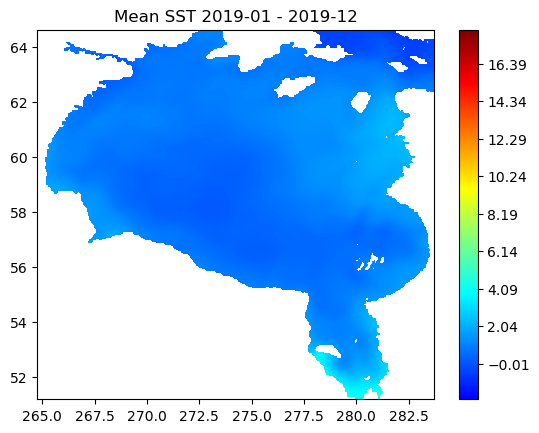

In [ ]:
mean_sst=np.mean(data.analysed_sst,axis=0) # calculate the yearly mean SST


#plot the yearly SST mean
plt.contourf(data.longitude, data.latitude, mean_sst, levs,cmap=cm)
plt.colorbar()
plt.title("Mean SST over Hudsn Bay " + date[0].strftime('%Y-%m')+' - '+date[11].strftime('%Y-%m'))
plt.show()

In [ ]:
data.close()

***

<img align="left" width="6%" style="padding-right:10px; padding-top:10px;" src="images/refs.png">

## Useful References

* [The official Python 3.6 documentation](https://docs.python.org/3.6/index.html)
* [NetCDF](https://www.unidata.ucar.edu/software/netcdf/)
    * [netCDF4 API documentation](http://unidata.github.io/netcdf4-python/)
* [(OPeNDAP)](https://www.opendap.org/)
    * [What is OPeNDAP?](https://www.earthdata.nasa.gov/engage/open-data-services-and-software/api/opendap)
    * [Data Download](http://test.opendap.org/dap/data/nc/sst.mnmean.nc.gz)
* [XArray Documentation](https://pypi.org/project/xarray/)
* [ERRDAP URL](https://oceanwatch.pifsc.noaa.gov/erddap/griddap/aqua_kd490_1d_2018_0.html)


<!--NAVIGATION-->
 [Contents](index.ipynb)